In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from IPython.display import display, HTML

import warnings 
warnings.simplefilter("ignore")

# Определение ценности клиента

Многие компании недооценивают своих клиентов. При оценке клиентов компания должна учитывать чистую приведенную стоимость (ЧПС) для долгосрочной прибыли, которую принесет клиент. Отказ от учета долгосрочной значимости клиента часто является причиной принятия компанией неправильного решения. Например, компания может сократить штат обслуживания клиентов на 10% для экономии 1 млн долларов, но в результате снижение качества обслуживания может привести к потере более 1 млн долларов в ценности клиента, что в итоге скажется на прибыльности компании. Способы определения ценности клиента рассматриваются на следующих двух примерах.

**Компания, работающая с кредитными картами, в настоящее время имеет коэффициент сохранения клиентов 80%. Насколько возрастет прибыльность компании, если коэффициент сохранения клиентов увеличится до 90% и выше?**

Этот пример основан на книге Фредерика Райхельда "Эффект лояльности" (Frederick Reichheld. The Loyalty Effect. — Harvard Business School Press, 2001). Данные к примеру находятся в файле Loyalty.xlsx. Райхельд оценивает прибыльность клиента-держателя кредитной карты на основе количества лет, в течение которых клиент является держателем карты. Например, в течение первого года держатель карты создает прибыль –40 долларов, что является результатом затрат на привлечение клиента и затрат на создание счета клиента. В течение каждого последующего года прибыль, приносимая клиентом, увеличивается, и клиент, являющийся держателем карты 20 лет и больше, приносит прибыль 161 доллар в год.

Компаниям, работающим с кредитными картами, необходимо определить зависимость ценности клиента от коэффициента сохранения клиентов в компании. В настоящее время коэффициент сохранения клиентов составляет 80%. Это означает, что в конце каждого года 20% (1 – 0,80) всех клиентов не возобновляют свои карты. (Эти 20% клиентов могут быть названы годовым коэффициентом "текучести" клиентов.) Компании, работающей с кредитными картами, необходимо определить долгосрочную ценность клиента для следующих значений коэффициента сохранения клиентов: 80, 85, 90, 95 и 99%.

Для определения долговременной ценности клиента начнем, например, с когорты из 100 клиентов. (*Когорта* — это группа лиц, имеющих общий статистический показатель. Размер группы, 100 человек, здесь выбран произвольно, но круглые числа позволяют не отвлекаться от анализа.) Затем для каждого года определим, сколько клиентов остается клиентами компании, по формуле (клиенты для года $t + 1$) = (коэффициент сохранения клиентов) × (клиенты для года $t$). Будем считать, что клиенты уходят только в конце каждого года. Затем с помощью функции `NPV` определим общую ЧПС (с учетом 15%-ной ставки дисконта), полученную от исходной когорты из 100 клиентов. 15%-ная ставка дисконта означает, что 1 доллар, заработанный через год от текущего момента, стоит так же, как 1,00/1,15 доллар сейчас. Разделив это число на количество клиентов в исходной когорте (100), получим ценность отдельного клиента.

ЧПС для денежных потоков на конец года преобразуются в ЧПС для денежных потоков на начало года путем умножения на `(1+процентная_ставка)`. При коэффициенте сохранения клиентов 80% ценность среднего клиента составляет 141,72 долларов. Для определения зависимости изменения ценности отдельного клиента от изменения годового коэффициента сохранения клиентов воспользуйтесь таблицей данных с одним входом. Повышение коэффициента сохранения клиентов с 80 до 90% почти удваивает ценность каждого клиента, что говорит "за" вежливое обращение с такими клиентами и "против" экономии на обслуживании клиентов. Осознание ценности клиента предоставляет большинству компаний ключ к повышению прибыльности.

**Междугородная телефонная компания предоставляет клиентам конкурентов стимул для смены компании. Насколько значительным должен быть стимул?**

Междугородная телефонная компания, средний клиент которой тратит 400 долларов в год, получает 10% прибыли с каждого потраченного доллара. В конце каждого года 50% клиентов компании переходят к конкурентам и 30% клиентов конкурентов без всякого стимула переходят в эту компанию. Компания рассматривает вопрос о предоставлении клиентам конкурентов одноразовый стимул для смены компании. Насколько значительным может быть стимул без убытка для компании?

Ключом к решению этой проблемы (см. файл Phoneloyalty.xlsx) является внимательное изучение ЧПС для двух ситуаций.
- **Ситуация 1.** Стоклиентовподключаютсякконкурентам.
- **Ситуация 2.** Компания платит ста клиентам конкурентов определенную сумму за переход.

Для отслеживания каждой ситуации в течение определенного времени (например, в течение 20 лет) можно с помощью подбора определить сумму $x$ в долларах (выплачиваемую клиенту за переход в компанию), что позволяет не проявлять беспокойства в следующих двух ситуациях.

- **Ситуация 1.** Компания просто платит каждому из ста нелояльных клиентов $x$ долларов за переход.
- **Ситуация 2.** Рынок состоит из ста нелояльных клиентов.

Ключевым шагом анализа является понимание того, что (клиенты компании в год t + 1) = 0,3 × (клиенты конкурентов в год t) + 0,5 × (клиенты компании в год t). Аналогично (клиенты конкурентов в год t + 1) = 0,7 × (клиенты конкурентов в год t) + 0,5 × (клиенты компании в год t).

***
1. Компания Whirlswim Appliance рассматривает возможность предоставить каждому своему клиенту бесплатное техническое обслуживание для каждого проданного DVD-плеера. Компания считает, что это предложение потребует заплатить в среднем 2,50 долларов за каждый проданный сегодня DVD-плеер (стоимость в сегодняшних долларах). В настоящее время рынок состоит из 72 000 потребителей, последняя покупка которых состоялась в компании Whirlswim, и из 86 000 потребителей, которые последний раз покупали у конкурентов компании. В указанном году 40% всех потребителей приобретают DVD-плеер. Если последняя покупка потребителя была в Whirlswim, с вероятностью 60% его следующая покупка также состоится в Whirlswim. Если последняя покупка была не в Whirlswim, с вероятностью 30% следующая покупка состоится в Whirlswim. Покупка в текущем году дает прибыль 20 долларов. Вклад в прибыль от покупателя (и расходы на техническое обслуживание для каждого покупателя) растет на 5% в год. Коэффициент дисконтирования для прибыли (относительно 30-летнего горизонта) составляет 10% в год. Предположим, что компания предоставляет бесплатное техническое обслуживание. Если последняя покупка клиента была в Whirlswim, вероятность того, что следующая покупка клиента будет в Whirlswim, увеличится на неизвестную величину в пределах от 0 до 10%. Аналогично, если компания предоставляет бесплатное техническое обслуживание, и последняя покупка клиента была не в Whirlswim, вероятность того, что следующая покупка будет в Whirlswim, увеличится на неизвестную величину в пределах от 0 до 10%. Следует ли компании Whirlswim принять политику бесплатного технического обслуживания?

In [25]:
import numpy_financial as npf

In [69]:
# base case
fraction_buying = 0.4
stay = 0.6 # stay with us
switch = 0.3 # switch to us
profit_contribution = 20
growth_rate = 1.05
discount_rate = 0.1
years = 30

In [46]:
def get_npv(fraction_buying: float = 0.4, 
            stay: float = 0.6,
            switch: float = 0.3, 
            profit_contribution: int = 20, 
            growth_rate: float = 1.05, 
            discount_rate: float = 0.1,
            yers: int = 30,
            us: int = 72000,
            them: int = 86000
           ) -> float:
    cash_flow = []
    for year in range(years+1):
        purchasers = us * fraction_buying * stay + them * fraction_buying * switch
        profit = profit_contribution * purchasers * growth_rate ** year
        cash_flow.append(profit)
        them_1 = them * ((1 - fraction_buying) + fraction_buying * (1 - switch)) \
                                               + us * fraction_buying * (1 - stay)
        us_1 = us * ((1 - fraction_buying) + fraction_buying * stay) + them * fraction_buying * switch
        them, us = them_1, us_1
    return npf.npv(discount_rate, cash_flow) # NPV

In [47]:
base_case = get_npv() # базовая чистая приведенная стоимость 9132948.159

Money back guarantee 5% get $50 product

In [59]:
switch_range = np.arange(.3, .4, .01)
stay_range = np.arange(.6, .7, .01)
df = pd.DataFrame(np.array([[get_npv(switch=switch, stay=stay, profit_contribution=17.5)
                for switch in switch_range] for stay in stay_range]) - base_case,
                index=stay_range, columns=switch_range)

In [67]:
df

,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40
0.60,-1.141619e+06,-1.001537e+06,-864611.582212,-730738.913411,-599819.055717,-471756.555285,-346459.965576,-223841.643385,-103817.556899,1.369290e+04,1.287671e+05
0.61,-1.031786e+06,-8.913570e+05,-754127.699655,-619991.584480,-488846.579146,-360594.976706,-235143.212633,-112401.652062,7715.610340,1.252909e+05,2.404033e+05
0.62,-9.193613e+05,-7.786066e+05,-641095.480805,-506718.659198,-375371.586749,-246954.244882,-121370.897695,1470.130019,121656.661451,2.392729e+05,3.543994e+05
0.63,-8.042524e+05,-6.631958e+05,-525427.006333,-390833.961268,-259309.618741,-130751.589017,-5061.910617,117853.181317,238083.472670,3.557150e+05,4.708301e+05
0.64,-6.863638e+05,-5.450309e+05,-407030.345296,-272247.423615,-140572.441731,-11900.578285,113868.408714,236830.423648,357077.260328,4.746968e+05,5.897733e+05
0.65,-5.655951e+05,-4.240135e+05,-285809.329874,-150864.872027,-19067.840897,109689.077807,235508.462172,358488.406446,478722.757912,5.963013e+05,7.113102e+05
0.66,-4.418414e+05,-3.000410e+05,-161663.315307,-26587.794703,105300.601242,234111.741821,359950.597344,482917.502629,603108.404177,7.206151e+05,8.355254e+05
0.67,-3.149926e+05,-1.730056e+05,-34486.923930,100686.903316,232633.740468,361466.074512,487291.324539,610212.116881,730326.543085,8.477284e+05,9.625074e+05
0.68,-1.849333e+05,-4.279440e+04,95830.227853,231067.161971,363037.121939,491855.275639,617631.547781,740470.907257,860473.636419,9.777356e+05,1.092348e+06
0.69,-5.154241e+04,9.071092e+04,229403.820959,364666.045443,496621.247872,625387.340562,751076.810810,873797.021050,993650.489975,1.110735e+06,1.225145e+06


In [66]:
df.min().abs().max() # this is improvement in NPV

1141618.5198800946

Похоже, что нам нужно `stay with us` и `switch to us` увеличить на 10% или больше, чтобы бесплатное техническое обслуживание окупилось.

***
2. Супермаркет "Mr. D" пытается определить, следует ли предоставить своим клиентам карту клиента. В настоящее время 30% всех покупателей лояльны к супермаркету "Mr. D". Лояльный клиент покупает в "Mr. D" в 80% случаев. Нелояльный к "Mr. D" клиент покупает в этом супермаркете в 10% случаев. Типичный покупатель тратит 150 долларов в неделю, и супермаркет "Mr. D" работает из 4% прибыли. Карта клиента обойдется супермаркету "Mr. D" в среднем 0,01 доллара на каждый потраченный доллар. Вы считаете, что доля лояльных к "Mr. D" покупателей увеличится на неизвестную величину в пределах от 2 до 10%. Вы также считаете, что доля случаев, когда лояльный клиент покупает в "Mr. D", увеличится на неизвестную величину в пределах от 2 до 12%. Следует ли супермаркету "Mr.D" предоставлять клиентам карту клиента? Следует ли супермаркету "Mr. D" предоставлять карту, если прибыль составляет 8%, а не 4%?

**Base Case**

In [70]:
loyal = .3
others = 1 - loyal

In [71]:
mrds_loyal = .8
mrds_others = .1
elsewhere_loyal = 1 - mrds_loyal
elsewhere_others = 1 - mrds_others

In [72]:
average_spending = 150
profit_margin = 0.04

In [73]:
go_to_mrds = 100 * loyal * mrds_loyal + 100 * others * mrds_others
go_elsewhere = 100 * loyal * elsewhere_loyal + 100 * others * elsewhere_others

In [76]:
spending = go_to_mrds * average_spending
profit = spending * profit_margin

Data table wasused to compute profit for each margin without the card

In [84]:
profit_margins = np.arange(0.04, 0.09, 0.01)
[spending * p for p in profit_margins]

[186.0, 232.5, 279.0, 325.50000000000006, 372.00000000000006]

**Customer advantage card**

In [88]:
def get_profit(loyal: float,
               mrds_loyal: float,
               mrds_others: float,
               average_spending: int,
               profit_margin: float,
               cost_of_program: float) -> float:
    
    others = 1 - loyal
    elsewhere_loyal = 1 - mrds_loyal
    elsewhere_others = 1 - mrds_others
    go_to_mrds = 100 * loyal * mrds_loyal + 100 * others * mrds_others
    go_elsewhere = 100 * loyal * elsewhere_loyal + 100 * others * elsewhere_others
    spending = go_to_mrds * average_spending
    profit = spending * profit_margin - cost_of_program * 100 * average_spending * loyal * mrds_loyal
    return profit

In [91]:
profit # base case profit

186.0

In [105]:
params = {
    'loyal': 0.30,
    'mrds_loyal': 0.80,
    'mrds_others': 0.1,
    'average_spending': 150,
    'profit_margin': 0.04,
    'cost_of_program': 0.01    
}
get_profit(**params) - profit

-36.0

In [131]:
time_loyal_range = np.arange(.82, .92, .02)
loyal_range = np.arange(.32, .44, .02)
df = pd.DataFrame(np.array([[get_profit(**{**params,
                                           'loyal': loyal,
                                           'mrds_loyal': time_loyal})
                for time_loyal in time_loyal_range] for loyal in loyal_range]) - profit,
                index=loyal_range, columns=time_loyal_range)

In [112]:
def color_positive(val):
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color

In [132]:
df.index = np.round(df.index, 2)
df.style.format('{:.2f}').applymap(color_positive) # higlighted outcomes result in increased profits with card

,0.82,0.84,0.86,0.88,0.9,0.92
0.32,-27.12,-24.24,-21.36,-18.48,-15.60,-12.72
0.34,-20.94,-17.88,-14.82,-11.76,-8.70,-5.64
0.36,-14.76,-11.52,-8.28,-5.04,-1.80,1.44
0.38,-8.58,-5.16,-1.74,1.68,5.10,8.52
0.4,-2.40,1.20,4.80,8.40,12.00,15.60
0.42,3.78,7.56,11.34,15.12,18.90,22.68


In [134]:
params['profit_margin'] *= 2 # CA cards 8% margins

df = pd.DataFrame(np.array([[get_profit(**{**params,
                                           'loyal': loyal,
                                           'mrds_loyal': time_loyal})
                for time_loyal in time_loyal_range] for loyal in loyal_range]) - profit,
                index=loyal_range, columns=time_loyal_range)

In [135]:
df.index = np.round(df.index, 2)
df.style.format('{:.2f}').applymap(color_positive)

,0.82,0.84,0.86,0.88,0.9,0.92
0.32,171.12,177.84,184.56,191.28,198.00,204.72
0.34,185.94,193.08,200.22,207.36,214.50,221.64
0.36,200.76,208.32,215.88,223.44,231.00,238.56
0.38,215.58,223.56,231.54,239.52,247.50,255.48
0.4,230.40,238.80,247.20,255.60,264.00,272.40
0.42,245.22,254.04,262.86,271.68,280.50,289.32


С 8% маржой карта клиента выглядит как хорошая идея. С маржой 4% такой уверенности нет.

# Оптимальный размер заказа в модели управления запасами

Когда магазин заказывает товар многократно, возникает естественный вопрос: какое количество товара магазин должен заказывать каждый раз? Если магазин закажет слишком много товара, возникнут непомерные запасы и затраты на их хранение. Если магазин закажет слишком мало товара, возникнут чрезмерные затраты на размещение заказов. Где-то должна находиться золотая середина, которая сводит к минимуму сумму годовых затрат на хранение запасов и затрат на размещение заказов.

Таким же образом рассмотрим завод, производящий продукцию партиями. Какой размер партии сводит к минимуму сумму годовой стоимости хранения запасов и затрат на организацию производства партии продукции? В данной главе на двух примерах показано, как формула оптимального размера заказа (предложенная в 1913 г. Ф. Харрисом (F. Harris) из Westinghouse Corporation) позволяет ответить на эти вопросы.

**Магазин электроники продает 10 000 мобильных телефонов в год. Каждый раз при размещении заказа на поставку мобильных телефонов магазин несет расходы в размере 10 долларов за заказ. Магазин платит 100 долларов за каждый мобильный телефон, и стоимость хранения телефона в запасе в течение года предположительно составляет 20 долларов. Когда магазин заказывает мобильные телефоны, каким должен быть размер заказа?**

Размер заказа, сводящий к минимуму сумму годовых затрат на хранение запасов и затрат на организацию производства, может быть определен после того, как станут известны следующие параметры:

- `K` — затраты на размещение заказа;
- `h` — затраты на хранение единицы продукции в течение года;
- 􏰀`D` — годовой спрос на продукт.

Пусть $q$ — размер заказа, тогда годовые затраты на его хранение равны $0.5qh$. (Назовем это уравнение уравнением 1.) Уравнение 1 имеет такой вид, потому что средний уровень запасов ($0.5q$) составляет половину от максимального уровня запасов. Для выяснения того, почему средний уровень запасов равен $0.5q$, можно вычислить средний уровень запасов для цикла (период времени между прибытием заказов). В начале цикла заказ прибывает, и уровень запасов равен $q$. В конце цикла все распродано, и уровень запасов равен 0. Поскольку спрос имеет постоянную интенсивность, средний уровень запасов в течение цикла просто равен среднему для 0 и $q$ или $0.5q$. Максимальный уровень запасов равен $q$, т. к. подразумевается, что заказы пребывают в тот момент, когда уровень запасов снижается до 0.

Поскольку в год размещается $D/q$ заказов, годовые затраты на размещение заказов равны $(D/q) * K$. (Назовем это уравнение уравнением 2.) Годовая сумма затрат на хранение и размещение заказов минимальна для значения $q$, равного оптимальному размеру заказа $EOQ$, который вычисляется по следующей формуле (уравнение 3):

$$EOQ = \sqrt{\frac{2KD}h}$$

Что показывает эта формула:
- увеличение спроса или затрат на размещение заказа увеличивает $EOQ$; 􏰀
- увеличение затрат на хранение уменьшает $EOQ$.

Безусловно, для определения чувствительности $EOQ$ и затрат к изменению $K$, $h$ и $D$ можно воспользоваться таблицей данных с одним или двумя входами. В данном примере $K = 10$ долларов, $D = 10 000$ мобильных телефонов в год и $h = 20$ долларов за хранение одного телефона. После ввода этих значений получим следующее:
- размер каждого заказа должен быть равен 100 мобильным телефонам;
- игодовые затраты на хранение, и затраты на размещение заказов составляют по 1000 долларов. Для оптимального размера заказа годовые затраты на хранение всегда равны годовым затратам на размещение заказов;
- общие годовые затраты (без учета затрат на приобретение) составляют 2000 долларов.

При работе с моделью оптимального размера заказа необходимо учесть следующее.
- Наличие оптовых скидок делает недействительным оптимальный размер заказа, поскольку тогда годовые затраты на приобретение зависят от размера заказа.
- Оптимальный размер заказа предполагает, что спрос имеет относительно постоянную интенсивность в течение года.
- Оптимальный размер заказа не следует использовать для продуктов, на которые существует сезонный спрос.
- Предполагается, что годовые затраты на хранение, как правило, составляют 10—40% от затрат на приобретение единицы продукции.

>Дополнительную информацию о построении моделей управления запасами см. в книге Уэйна Винстона (Wayne L. Winston. Operations Research: Applications and Algorithms. — Duxbury Press, 2007).

**Завод-производитель компьютеров производит 10 000 серверов в год. Себестоимость производства каждого сервера составляет 2000 долларов. Стоимость организации производства партии серверов составляет 200 долларов, а стоимость хранения сервера в запасе в течение года — 500 долларов. При необходимости завод может производить 25 000 серверов в год. Каким должен быть размер партии при производстве серверов?**

Модель оптимального размера заказа предполагает, что после размещения заказа заказ прибывает моментально. Когда компания производит продукт, а не заказывает его, заказ должен быть произведен и не может прибыть мгновенно. В таких ситуациях вместо вычисления размера заказа, сводящего затраты к минимуму, необходимо определить размер партии, сводящей затраты к минимуму. Когда компания производит продукцию, а не закупает ее извне, размер партии, сводящей затраты к минимуму, зависит от следующих параметров:

- `K` — затраты на организацию производства партии продукта;
- `h` — затраты на хранение единицы продукции в запасе в течениегода;
- `D` — годовой спрос на продукт;
- `R` — годовой показатель производства продукта. Например, IBM может произвести 25 000 серверов в год.

Пусть `q` — размер каждой партии продукта, тогда годовые затраты на хранение равны `0,5 × (q/R) × (R – D) × h`. (Назовем это уравнение уравнением 4.) Уравнение 4 имеет такой вид, потому что производство каждой партии продолжается `q/R` лет, и во время производственного цикла запас увеличивается как `R – D`. Максимальный уровень запасов, который имеет место после завершения производства партии, можно вычислить как (`q/R) × (R – D)`. Таким образом, средний уровень запасов равен `0,5 × (q/R) × (R – D)`.

Поскольку в год производится `D/q` партий, годовые затраты на организацию производства равны `KD/q` (назовем это уравнением 5). Размер партии, сводящей к минимуму сумму годовых затрат на организацию производства и годовых затрат на хранение, вычисляется по следующему уравнению (уравнение 6). Эта модель называется оптимальным размером партии:

$$EOB = \sqrt{\frac{2KDR}{h(R−D)}}$$

Исходя из этой формулы, можно определить следующее:
- увеличение $K$ или $D$ увеличивает оптимальный размер партии; 
- увеличение $h$ или $R$ уменьшает оптимальный размер партии.

Для этого примера $K = 200$ долларов, $h = 500$ долларов, $D = 10 000$ единиц в год и $R = 25 0004 единиц в год. После ввода значений получим следующее:
  
 - Размер партии, сводящей к минимуму затраты, составляет 115,47 шт. Таким образом, компания должна произвести 115 или 116 серверов в каждой партии. 
 - Годовые затраты на хранение и на организацию производства составляют по 17 320,51 долларов. Как и в предыдущем случае, для оптимального размера партии годовые затраты на хранение всегда равны годовым затратам на организацию производства.
 - Общие годовые затраты (без учета переменных затрат на производство) составляют 34 641,02 долларов.
 - В год производится 86,6 партии.
 
При работе с моделью оптимального размера партии необходимо учесть следующее.
- Если переменные затраты на производство единицы продукции зависят от размера партии, модель оптимального размера партии является недействительной.
- Модель оптимального размера партии предполагает, что спрос имеет относительно постоянную интенсивность в течение года. Эту модель не следует использовать для продукции, на которую существует сезонный спрос.
- Предполагается, что годовые затраты на хранение, как правило, составляют 10—40% от затрат на производство единицы продукции.

***
1. Магазин бытовой техники продает телевизоры высокой четкости. Годовой спрос оценивается в 1000 единиц. Стоимость хранения одного телевизора в течение года составляет 500 долларов, а стоимость размещения заказа на телевизоры — 400 долларов.
- Сколько телевизоров следует заказывать каждый раз при размещении заказа?
- Сколько заказов в год должно быть размещено?
- Каковы годовые затраты на хранение и размещение заказов?

In [138]:
K = 400 # cost/order
h = 500 # annual holding cost per unit
D = 1000 # annual demand

EOQ = np.sqrt(2 * K * D / h) # order quantity
annorders = D / EOQ # orders per year
annhc = 0.5 * h * EOQ # holding cost per year
annoc = annorders * K # order cost per year
anncost = annhc + annoc # total annual cost (excluding purchasing)

In [149]:
print(f'Размер заказа: {EOQ:.0f}\nЗаказов в год: {annorders:.0f}\n\
Затраты на хранение: {annhc:.0f}, размещение: {annoc:.0f}')

Размер заказа: 40
Заказов в год: 25
Затраты на хранение: 10000, размещение: 10000


***
Предположим, что компания Waterford Crystal может произвести до 100 кувшинов для чая со льдом в день. Далее предположим, что завод открыт 250 дней в году и годовой спрос составляет 20 000 кувшинов. Стоимость хранения кувшина в течение года может составить 10 долларов, а стоимость организации производства кувшинов для чая со льдом — 40 долларов.
- Каков рекомендуемый размер партии для кувшинов?
- Сколько партий в год должно быть произведено?
- Каковы годовые затраты на организацию производства и хранения кувшинов для чая со льдом?

In [153]:
K = 200 # cost per batch
h = 500 # annual holding cost per unit
D = 10_000 # annual demand
r = 25_000 # annual production rate

EOB = np.sqrt((2 * K * D * r) / (h * (r - D))) # batch size
annbatches =  D / EOB # batches per year
annhc = (EOB / r) * (r - D) * 0.5 * h # holding cost per year
annoc = annbatches * K # order cost per year
anncost = annhc + annoc # total annual cost (excluding purchasing)

In [155]:
print(f'- Рекомендуемый размер партии: {EOB:.2f}\n'
      f'- Партий в год: {annbatches:.2f}\n'
      f'- Годовые затраты на организацию производства и хранение: {annoc:.2f}, {annhc:.2f}'
)

- Рекомендуемый размер партии: 115.47
- Партий в год: 86.60
- Годовые затраты на организацию производства и хранение: 17320.51, 17320.51


# Построение моделей управления запасами для неопределенного спроса

Ранее было показано, как определить оптимальный размер заказа и оптимальный размер партии производимого продукта. В примерах предполагалось, что спрос на продукт имел постоянную интенсивность. Таким образом, если годовой спрос составлял, например, 1200 единиц в год, ежемесячный спрос был равен 100 единицам. Пока спрос возникает с относительным постоянством, оптимальный размер заказа является достаточно хорошим приближением для размера заказа, сводящего затраты к минимуму.

В действительности спрос в любой период времени точно не известен. Когда спрос не определен, возникает естественный вопрос, насколько можно снизить уровень запасов до того, как разместить заказ. Уровень запасов, при котором заказ должен быть размещен, называется точкой заказа. Очевидно, что высокая точка заказа снизит потери от дефицита и увеличит затраты на хранение. Аналогично, низкая точка заказа увеличит потери от дефицита и снизит затраты на хранение. В некой промежуточной точке заказа сумма потерь от дефицита и затрат на хранения будет минимальной. В первом примере этой главы показано, как определить точку заказа, сводящую к минимуму ожидаемые потери от дефицита и затраты на размещение заказов и хранение запасов, на основе двух следующих предположений.

- Каждая недостающая единица продукции является невыполненным заказом клиента, и компания несет потери от дефицита $C_B$. Эти потери в первую очередь являются показателем неудовлетворенности клиента, вызванной несвоевременным получением заказанной продукции.
- Каждая недостающая единица продукции приводит к упущенному сбыту, и компания несет потери $C_{LS} > C_B$. Потери упущенного сбыта включают прибыль, не полученную вследствие упущенного сбыта, а также потери от дефицита, входящие в $C_B$.

Во втором примере показано, как определить оптимальную точку заказа на основе уровня обслуживания. Например, 95%-ный уровень обслуживания означает, что точка заказа устанавливается на уровне, обеспечивающем в среднем удовлетворение 95% всего спроса в срок. Как правило, стоимость потерь от дефицита и в случае невыполненного заказа, и в случае упущенного сбыта определить трудно. По этой причине большинство компаний подходит к установке точек заказов на основе уровня обслуживания.

**При каком уровне запасов следует размещать заказ, если необходимо свести к минимуму потери от дефицита и годовые затраты на хранение запасов и размещение заказов?**

Оптимальный размер заказа зависит от следующих параметров:
- $K$ — затраты на размещение заказа;
- $h$ — затраты на хранение одной единицы продукции в запасе в течение года;
- $D$ — годовой спрос на продукт. Поскольку теперь спрос точно не известен, пусть $D$ обозначает ожидаемый годовой спрос на продукт.

### Невыполненный заказ

Сначала предположим, что каждый дефицит приводит к задержке заказа. Другими словами, дефицит не приводит к упущенному сбыту. Также подразумевается, что каждая недостающая единица продукции приводит к потерям от дефицита $C_B$. В этом случае точка заказа зависит от следующих величин:

- `EOQ` — оптимальный размер заказа (количество, заказываемое каждый раз при размещении заказа);
- `K` — затраты на размещение заказа;
- `h` — годовые затраты на хранение единицы продукции;
- `D` — среднегодовой спрос;
- `SOC` — потери от недостающей единицы продукции;
- `annsig` — стандартное отклонение годового спроса;
- `meanLT` — среднее время на выполнение нового заказа, т.е. среднее время между размещением и получением заказа;
- `sigmaLT` — стандартное отклонение времени на выполнение нового заказа.


Предположим, что универмаг старается определить оптимальную политику хранения для заказанных электрических миксеров. Он располагает следующей информацией:
- размещение заказа на миксеры стоит 50 долларов;
- хранение миксера в запасе в течение года стоит 10 долларов;
- в среднем универмаг продает 1000 миксеров в год;
- все клиенты, которые пытаются приобрести миксеры, когда они уже распроданы, возвращаются позже и покупают миксеры, когда они есть на складе. Универмаг получает штраф в размере 20 долларов за каждую единицу дефицита;
- годовой спрос на миксеры (на основе исторических данных) имеет стандартное отклонение 40,8;
- время на выполнение нового заказа всегда составляет две недели (0,038года), со стандартным отклонением 0.

После ввода `K`, `h` и `D` вычисляется оптимальный размер заказа (100 миксеров). После ввода значений `SOC`, `annsig`, `meanLT` и `sigmaLT` вычисляется точка заказа, сводящая к минимуму сумму ожидаемых годовых затрат на хранение и потерь от дефицита (51,63 миксера). Таким образом, универмаг должен заказывать по 100 миксеров, как только запасы понизятся до 51,62 (или 52) миксеров.

Уровень страхового запаса, связанный с заданной точкой заказа, равен `(точка заказа) – (средний спрос за время выполнения нового заказа)`.

Универмаг поддерживает уровень страхового запаса `51,62 – 38,46 = 13,16` миксера. По существу, страховой запас всегда находится на складе, что приводит к дополнительным затратам на хранение. Высокий уровень страхового запаса, безусловно, уменьшает дефицит.

### Упущенный сбыт

Теперь предположим, что каждый дефицит приводит к упущенному сбыту. Потери, связанные с упущенным сбытом, как правило, оцениваются как штраф за невыполненный заказ плюс прибыль, связанная с проданной единицей продукции. Предположим, что универмаг получает 20 долларов прибыли от продажи каждого миксера. Тогда потери от дефицита для случая упущенного сбыта составляют 40 долларов (20 долларов упущенной прибыли + 20 долларов штрафа за дефицит).

После ввода потерь от упущенного сбыта в размере 40 долларов, оказывается, что оптимальная политика хранения требует заказывать по 100 миксеров и размещать заказ, когда запасы снижаются до 54,23 миксера. Уровень страхового запаса составляет 15,77 миксера, и спрос на миксеры не будет удовлетворен на 2,4%. Обратите внимание, что предположение об упущенном сбыте увеличило точку заказа и уменьшило вероятность дефицита. Это произошло потому, что из-за увеличения потерь от дефицита (с 20 до 40 долларов) универмаг прилагает больше усилий, стремясь избежать дефицита.

Увеличение неопределенности значительно повышает точку заказа. Например, в случае упущенного сбыта, если стандартное отклонение для времени на выполнение нового заказа составляет одну неделю (0,019 года), а не 0, точка заказа повышается до 79,50 миксера, а страховой запас увеличивается более чем в два раза по сравнению с тем случаем, когда время на выполнение нового заказа было точно известно.

### Что означает термин "95-процентный уровень обслуживания"?
95%-ный уровень обслуживания означает просто удовлетворение 95% спроса в срок. Поскольку оценить штраф из-за дефицита и/или штраф от упущенного сбыта часто достаточно трудно, многие компании устанавливают уровни страхового запаса продукции посредством установки уровня обслуживания.

В качестве примера рассмотрим аптеку, для которой требуется определить оптимальную политику хранения запаса лекарственного препарата. Аптека должна удовлетворять 95% спроса на лекарственный препарат в срок. Для расчета необходимы следующие параметры:
- размещение заказа на лекарственный препарат стоит 50 долларов;
- затраты на хранение единицы препарата в запасе в течение года составляют 10 долларов;
- среднегодовой спрос на препарат составляет 1000 единиц;
- стандартное отклонение годового спроса составляет 69,28 единицы;
- время, затрачиваемое на выполнение нового заказа, всегда равно одному месяцу (0,083 года).

В таблице приведены точки заказа и уровни страхового запаса, соответствующие уровням обслуживания от 80 до 99%.

|Уровень обслуживания, %|Точка заказа, единицы продукции|Страховой запас, единицы продукции|
|--|--|--|
|80|65,34|–17,99|
|85|71,85|–11,48|
|90|79,57|–3,76|
|95|90,23|6,90|
|99|108,44|25,11|

Обратите внимание, что при повышении уровня обслуживания с 80 до 99% точка заказа увеличивается почти на 67%! Также следует отметить, что 90%-ный уровень обслуживания может быть достигнут при точке заказа, меньшей чем средний спрос за время выполнения нового заказа. 90%-ный уровень обслуживания приводит к отрицательному уровню страхового запаса. Это возможно, поскольку дефицит возникает только во время выполнения нового заказа, а время выполнения нового заказа охватывает небольшую часть года.

***
В заданиях 1 и 2 предполагается, что в ресторане подается в среднем 5000 бутылок вина в год. Стандартное отклонение годового спроса на вино составляет 1000 бутылок. Ежегодные затраты на хранение бутылки вина равны одному доллару. Размещение заказа на вино обходится в 10 долларов и доставка вина в среднем занимает три недели (со стандартным отклонением в одну неделю):
1. Предположим, что если в ресторане заканчивается вино, он получает штраф в 5 долларов, как результат потери репутации. Кроме того, ресторан получает прибыль в размере двух долларов за каждую бутылку вина. Определите оптимальную политику заказа вина.

In [156]:
from scipy.stats import norm

In [200]:
K = 10 # cost/order
h = 1 # annual holding cost per unit
D = 5000 # mean annual demand
EOQ = np.sqrt(2 * K * D / h) # order quantity
annorders = D / EOQ # orders per year
LSC = 5 # lost sales cost
annsig = 40.8 # annual sigma
meanLT = 3 / 52 # mean lead time
sigmaLT = 1 / 52 # sigma lead time
meanLTD = meanLT * D # mean lead time demand
sigmaLTD = np.sqrt(meanLT * annsig**2 + D**2 * sigmaLT**2) # sigma lead time demand
probout = min(0.99999, h * EOQ / (D * LSC + h * EOQ)) # probability of stockout 
RP = norm.isf(probout, meanLTD, sigmaLTD) # reorder point
SS = RP - meanLTD # safety stock

Здесь упущенные продажи кажутся более разумными.

In [204]:
f'При остатке {EOQ:.0f} бутылок следует заказать партию из {RP:.0f} бутылок.'

'При остатке 316 бутылок следует заказать партию из 505 бутылок.'

***
2. Определите политику хранения вина, которая дает 99%-ный уровень обслуживания.

In [369]:
SL = 0.99 # service level
K = 10 # cost/order
h = 1 # annual holding cost per unit
D = 5000 # mean annual demand
EOQ = np.sqrt(2 * K * D / h) # order quantity
annorders = D / EOQ # orders per year
annsig = 69.28 # annual sigma
meanLT = 3 / 52 # mean lead time
sigmaLT = 1 / 52 # sigma lead time
meanLTD = meanLT * D # mean lead time demand
sigmaLTD = np.sqrt(meanLT * annsig**2 + D**2 * sigmaLT**2) # sigma lead time demand

In [372]:
# solve standardized reorder point
SROP = 1
NLSTANDROP = (EOQ * (1 - SL) / sigmaLTD)
NLSTANDROP_fun = lambda x: norm.pdf(x, 0, 1) - x * norm.sf(x)  # normal loss for stand. ROP
while NLSTANDROP_fun(SROP) > NLSTANDROP:
    SROP += 0.00001

In [373]:
# solve reorder point
ROP = 1
while (ROP - meanLTD) / sigmaLTD <= SROP:
    ROP += 0.00001

In [374]:
f'Когда остаток бутылок на складе приблизится к {ROP:.0f}, нужно сделать повторный заказ.'

'Когда остаток бутылок на складе приблизится к 431, нужно сделать повторный заказ.'

***
3. Политику определения точки заказа часто называют политикой двух контейнеров. Как может быть реализована политика определения точки заказа, если для хранения запасов используются два контейнера?

Предположим, точка заказа ROP составляет 400 единиц. Всякий раз, когда получен заказ
заполняем контейнер №2 до 400 единиц, а оставшиеся единицы оставим в контейнере №1. Как только контейнер №1 опустеет, пора делать повторный заказ!

# Теория массового обслуживания (теория очередей)

Все мы тратим много времени в очередях, и как скоро будет показано, небольшое увеличение пропускной способности в обслуживании часто может значительно сократить очередь. В бизнесе важно удостовериться, что клиенты не тратят слишком много времени на ожидание. Таким образом, деловые люди должны знать теорию очередей, обычно называемую теорией массового обслуживания. В этой главе показано, как определить пропускную способность, необходимую для обеспечения соответствующего обслуживания.

### Какие факторы влияют на длину очереди и время, проведенное клиентами в очереди?
В этой главе рассматриваются задачи массового обслуживания, в которых все прибывающие клиенты ждут первого доступного специалиста в единой очереди. (Для простоты назовем такого специалиста сервером.) Эта модель дает довольно точное представление о ситуациях, возникающих при ожидании в банке, на почте или при контроле безопасности в аэропорту. Кстати, идею ожидания клиентов в одной очереди выдвинули примерно в 1970 г., когда в банковских и почтовых отделениях осознали, что хотя ожидание в единой очереди не уменьшает среднее время ожидания для клиентов, но оно снижает изменчивость времени, проводимого клиентами в очереди, что создает более справедливую систему.

На время, которое клиенты проводят в системе массового обслуживания, влияют три фактора.

- **Количество специалистов.** Очевидно, что чем больше специалистов, тем меньше времени в среднем проводят клиенты в очереди и меньше людей в среднем стоит в очереди.
- **Среднее значение и стандартное отклонение времени между прибытием клиентов.** Время между прибытиями клиентов называется временным интервалом между прибытиями. Если средний временной интервал между прибытиями увеличивается, количество прибытий уменьшается, что приводит к более короткой очереди и меньшему времени, проведенному клиентом в системе массового обслуживания. Как будет показано вскоре, увеличение стандартного отклонения временного интервала между прибытиями увеличивает среднее время, проведенное клиентом в системе массового обслуживания, и среднее количество присутствующих клиентов.
- **Среднее значение и стандартное отклонение времени, необходимого для обслуживания клиента.** Если среднее время обслуживания увеличивается, то повышается среднее время, проведенное клиентом в системе массового обслуживания, и количество присутствующих клиентов. Увеличение стандартного отклонения времени обслуживания увеличивает среднее время, проведенное клиентом в системе массового обслуживания, и среднее количество присутствующих клиентов.

### Какие условия должны быть выполнены перед анализом среднего количества присутствующих клиентов или среднего времени, проведенного клиентом в системе массового обслуживания?
При анализе времени ожидания клиентов в очередях математики говорят о характеристиках устойчивого состояния системы. По существу, устойчивое состояние означает, что система работает в течение длительного времени. Если же говорить более конкретно, аналитикам необходимо выяснить значения следующих величин в устойчивом состоянии:

- $W$ —среднее время, проведенное клиентом в системе;
- $W_q$ — среднее время ожидания в очереди до обслуживания;
- $L$ — среднее количество клиентов, присутствующих в системе;
- $L_q$ — среднее количество клиентов, ожидающих в очереди.

Кстати, равенства $L$ = (1/среднее время между прибытиями) × $W$ и $L_q$ = (1/среднее время между прибытиями) × $W_q$ справедливы всегда.
Для корректного обсуждения устойчивого состояния системы массового обслуживания должно иметь место следующее.

- Среднее значение и стандартное отклонение времени между прибытиями и времени обслуживания мало изменяются с течением времени. С технической точки зрения это означает, что распределение для времени между прибытиями и времени обслуживания является постоянным во времени.

- 􏰀(1/среднеевремяобслуживания)×(количествоспециалистов)>(1/(среднеевремя между прибытиями)). Это уравнение 1.

По сути, если уравнение 1 выполняется, за час можно обслужить больше клиентов, чем прибудет новых. Например, если среднее время обслуживания равно двум минутам (или 1/30 часа), и среднее время между прибытиями составляет 1 минуту (или 1/60 часа), из уравнения 1 следует, что 30 × (количество специалистов) > 60 или что для устойчивого состояния системы количество специалистов должно быть больше или равно 3. Если клиенты не обслуживаются быстрее, чем прибывают новые, в конце концов, накопится отставание, которое никогда не будет наверстано, что приведет к бесконечной очереди.

### Почему изменчивость снижает производительность системы массового обслуживания?
Для выяснения того, почему изменчивость снижает производительность системы массового обслуживания, рассмотрим систему с одним сервером, в которой клиенты прибывают каждые две минуты, и время обслуживания всегда равно 2-м минутам. В такой системе никогда не будет больше одного клиента. Теперь предположим, что клиенты прибывают каждые 2 минуты, но половина всех времен обслуживания составляет 0,5 минуты, а другая половина — 3,5 минуты. Даже если прибытия полностью предсказуемы, неопределенность во времени обслуживания означает, что, в конце концов, сервер будет запаздывать, и сформируется очередь. Например, если для обслуживания первых четырех клиентов потребуется по 3,5 минуты, через 12 минут в очереди будут ожидать четыре клиента

|Время, минут|Событие|Присутствуют после события, человек|
|:--|--|:--:|
|0|Прибытие|1|
|2|Прибытие|2|
|3,5|Обслуживание завершено|1|
|4|Прибытие|2|
|6|Прибытие|3|
|7|Обслуживание завершено|2|
|8|Прибытие|3|
|10|Прибытие|4|
|10,5|Обслуживание завершено|3|
|12|Прибытие|4|

***
В банке работает шесть операционистов. На основе следующей информации:
- среднее время обслуживания равно 1 минуте;
- среднее время между прибытиями равно 25 секундам;
- стандартное отклонение времени обслуживания равно 1 минуте;
- стандартное отклонение времени между прибытиями равно 10 секундам выполните задания 1—4.

1. Определите среднее время ожидания клиента в очереди.

In [375]:
from scipy.stats import poisson

In [418]:
# Allen-Cunneen Approximation
def queue_sim(s: int = 6) -> float:
    mean_interarrival_time = 25 / 60
    mean_service_time = 1
    std_nterarrival_times = 1 / 6
    std_service_times = 1
    arrival_rate = 1 / mean_interarrival_time
    service_rate = 1 / mean_service_time

    CV_arrive = mean_interarrival_time / std_nterarrival_times
    CV_service = mean_service_time / std_service_times

    mu = arrival_rate / service_rate
    ro = arrival_rate / (s * service_rate)

    R = 1 - poisson.pmf(s, mu) / poisson.cdf(s, mu) # R(s, mu)
    E = (1 - R) / (1 - ro * R) # Ec(s, mu)
    Wq = (E / (s * (1 - ro))) * ((CV_arrive + CV_service) / 2) * (1 / service_rate) if ro < 1 else 'no answer'

    Lq = arrival_rate * Wq if ro < 1 else 'no answer'
    W = Wq + (1 / service_rate) if ro < 1 else 'no answer'
    L = arrival_rate * W if ro < 1 else 'no answer'
    return L

In [413]:
f'среднее время ожидания клиента в очереди {W:.2f} мин.'

'среднее время ожидания клиента в очереди 1.00 мин.'

2. Сколько клиентов в среднем присутствует в очереди?

In [412]:
f'в очереди в среднем {L:.2f} клиентов'

'в очереди в среднем 2.41 клиентов'

3. Рекомендуется ли подключить к работе дополнительных операционистов?

Нет. Все под контролем

4. Предположим, что работа операциониста стоит 20 долларов в час, а время клиента банк оценивает в 15 долларов в час. Сколько операционистов должно работать в банке?

In [414]:
cost_per_hour = 20 * s + 15 * L
cost_per_hour # an average of L people are present so waiting cost/hour=15L

156.13151591292387

In [422]:
[20 * s + 15 * queue_sim(s) for s in range(3, 9)] # 3 tellers is cheapest

[95.64707198009,
 116.49054545523026,
 136.31307804968148,
 156.13151591292387,
 176.04428585477535,
 196.01271761268944]

Дешевле всего иметь в штате 3 специалистов.

***
5. На пятом этаже бизнес-школы работают 30 женщин. Предположим, что каждая женщина посещает туалетную комнату три раза в день (офис открыт с 8 утра до 5 вечера), и каждое такое посещение в среднем продолжается 180 секунд со стандартным отклонением 90 секунд. Предположим, что стандартное отклонение времени между прибытиями в туалетную комнату составляет 5 минут. Сколько кабинок рекомендуется установить в туалетной комнате?

In [476]:
# 90 arrivals in 
# 9 hours
# 10 per hour
# 1/6 per minute

s = 3
arrival_rate = 1 / 6 # per minute
service_rate = 1 / 3 # per minute
mean_interarrival_time = 12.864
mean_service_time = 77.102
std_nterarrival_times = 5
std_service_times = 1.5

CV_arrive = (std_nterarrival_times / mean_interarrival_time) ** 2
CV_service = (std_service_times / mean_service_time) ** 2

mu = arrival_rate / service_rate
ro = arrival_rate / (s * service_rate)

R = 1 - poisson.pmf(s, mu) / poisson.cdf(s, mu) # R(s, mu)
E = (1 - R) / (1 - ro * R) # Ec(s, mu)
Wq = (E / (s * (1 - ro))) * ((CV_arrive + CV_service) / 2) * (1 / service_rate) if ro < 1 else 'no answer'

Lq = arrival_rate * Wq if ro < 1 else 'no answer'
W = Wq + (1 / service_rate) if ro < 1 else 'no answer'
L = arrival_rate * W if ro < 1 else 'no answer'

- With 1 toilet women wait an average of .23 minutes
- With 2 toilets women wait  average of .015 minutes
- With 3 toilets women wait average of .001 minutes

Похоже, что 2 кабинки дают приличную выгоду по сравнению с 1, но 3-я была бы лишней.

# Оценка кривой спроса

В любом бизнесе необходимо определить цену для каждого продукта. Оценить продукт должным образом достаточно трудно. Для более полного представления о ценообразовании см. книгу Роберта Долана и Германа Саймона (Robert J. Dolan, Hermann Simon. Power Pricing. — Free Press, 1997).

### Что необходимо знать при назначении цены продукта?
Рассмотрим такой продукт, как шоколадный батончик. Для определения цены, приносящей максимальную прибыль, необходимо знать две вещи:

- переменные затраты на производство каждой единицы продукции (назовем эту величину $UC$);
- кривую спроса на продукт. Иными словами, кривая спроса показывает количество единиц продукта, которое потребуется клиенту по каждой цене. Таким образом, если изменить цену единицы продукции на p долларов, то по кривой спроса можно определить число $D(p)$, эквивалентное количеству единиц продукции, которые будут востребованы по цене $p$ долларов. Безусловно, кривая спроса постоянно изменяется и часто зависит от факторов, находящихся вне контроля компании (таких как состояние экономики и цена конкурентов).

Если значение $UC$ и кривая спроса известны, прибыль, соответствующая цене в $p$ долларов, просто равна $(p-UC) \times D(p)$. Если известно уравнение для $D(p)$, вычисляющее количество востребованного продукта для каждой цены, можно найти цену, обеспечивающую максимальную прибыль.

### В чем смысл эластичности спроса?
В соответствии с кривой спроса ценовая эластичность спроса — это относительное снижение спроса в результате увеличения цены на 1%. Если эластичность выше 1%, спрос является эластичным по цене. Когда спрос эластичен по цене, снижение цены увеличивает выручку. Если эластичность меньше 1%, спрос является неэластичным по цене. Когда спрос неэластичен по цене, снижение цены снижает выручку. Далее приведены наблюдаемые оценки эластичности спроса на некоторые продукты.

- Соль — 0,1 (крайне неэластичный).
- Кофе — 0,25 (неэластичный).
- Гонорары адвокатов — 0,4 (неэластичный).
- Телевизоры — 1,2 (незначительно эластичный).
- Ресторанная еда — 2,3 (эластичный).
- Зарубежные поездки — 4,0 (очень эластичный).

Например, снижение стоимости зарубежной поездки на 1% приводит к увеличению спроса на зарубежные поездки на 4%.

### Существует ли простой способ оценки кривой спроса?
Пусть $q$ — величина спроса на продукт. Для оценки кривой спроса наиболее часто используются две формы.

- Линейная кривая спроса. В этом случае спрос соответствует прямолинейному соотношению в виде $q = a – bp$. Например, $q = 10 – p$ — линейная кривая спроса. Если кривая спроса линейна, эластичность постоянно изменяется.
- Степенная кривая спроса. В этой ситуации кривая спроса описывается степенной кривой в виде $q = ap^b$, где $b < 0$. Уравнение $q = 100p^{-2}$ является примером степенной кривой спроса. Если спрос соответствует степенной кривой, эластичность равна $-b$ для любой цены. Таким образом, для кривой спроса $q = 100p^{-2}$ ценовая эластичность спроса всегда равна 2.

Предположим, что кривая спроса на продукт соответствует линейной или степенной кривой спроса. Если известна текущая цена и спрос на продукт, а также ценовая эластичность спроса для продукта, определить кривую спроса для продукта несложно. Далее приводятся два примера.

Пусть в настоящее время продукт продается за 100 долларов, и спрос на него составляет 500 единиц. Ценовая эластичность спроса для продукта равна 2. Предположим, что кривая спроса является линейной. Необходимо определить уравнение кривой спроса. Как известно, если даны две точки, то через них можно провести только одну прямую линию. Для кривой спроса действительно известны две точки. $p = 100$ и $q = 500$ — одна из них. Поскольку эластичность спроса равна 2, однопроцентное повышение цены приводит к уменьшению спроса на 2%. Следовательно, если $p = 101$ (однопроцентное повышение), спрос падает на 2% от 500 (10 единиц) до 490. Таким образом, $p = 101$ и $q = 490$ — это вторая точка кривой спроса. Теперь с помощью линии тренда можно найти прямую линию, проходящую через точки (100,500) и (101,490).

Так как $x$ — это цена, а $y$ — спрос, уравнение для кривой спроса имеет вид $q = 1500 - 10p$. Это уравнение означает, что каждое повышение цены на 1 доллар стоит 10 единиц спроса. Безусловно, спрос не может быть линейным для всех значений цены, поскольку для больших значений $p$ линейная кривая спроса приведет к негативному спросу. Однако для цен, близких к текущей цене, линейная кривая спроса является достаточно хорошим приближением к истинной кривой спроса на продукт.

### Каким образом кривая спроса показывает готовность клиента платить за продукт?
Предположим, что вы пытаетесь продать программный продукт компании из списка Fortune 500. Пусть $q$ — это количество копий программного продукта, которое требуется компании, а $p$ — цена программного продукта. Вы считаете, что кривая спроса на программный продукт описывается уравнением $q = 400 - p$. Очевидно, что клиент хотел бы платить меньше за каждую дополнительную копию программного продукта. В этой кривой спроса заключена информация о том, сколько компания готова платить за каждую копию программного продукта. Эта информация является ключевой для максимального увеличения прибыльности продажи.

Перепишем уравнение кривой спроса так: $p = 400 - q$. Таким образом, если $q = 1, p = 399$ долларов и т. д. Теперь попытаемся определить ценность, которую клиент придает каждой из первых двух копий программного продукта. Предположим, что клиент мыслит рационально, т. е. будет покупать копию программного продукта тогда и только тогда, когда ценность этой копии превысит цену. При цене 400 долларов спрос равен 0, так что первая копия не может стоить 400 долларов. Однако при цене 399 долларов образуется спрос на одну копию программного продукта. Следовательно, первая копия программного продукта должна стоить где-то между 399 и 400 долларами. Аналогично, при цене 399 долларов клиент не купит вторую копию программного продукта. Однако при цене 398 долларов клиент покупает две копии, т. е. клиент покупает вторую копию. Следовательно, потребительская ценность второй копии находится где-то между 399 и 398 долларами.

Можно показать, что наилучшим приближением стоимости $i$-й единицы продукта, покупаемой клиентом, является цена, при которой спрос равен $i - 0,5$. Например, если установить для $q$ значение 0,5, то стоимость первой копии равна 400 – 0,5 = 399,50 долларов. Аналогично, если установить $q = 1,5$, стоимость второй копии равна 400 – 1,5 = 398,50 долларов.

1. Предположим, что вы оценили изобретенную настольную игру в 60 долларов и продали 3000 штук этой игры за последний год. Известно, что ценовая эластичность для настольных игр равна 3. Исходя из этой информации, определите линейную и степенную кривые спроса.

In [507]:
price = [60, 60.6]
demand = [3000, 2910]

In [508]:
np.polyfit(price, demand, 1) # q = 12000 - 150 * price

array([ -150., 12000.])

In [509]:
# q = a * price^-3
q = 3000
p = 60
a = 0
while a * p ** -3 < 3000:
    a += 10

или

In [513]:
a = q / p ** -3 # q = 648000000 * 60^-3
a

648000000.0

***
2. Для каждого ответа из задания 1 определите потребительскую стоимость двухтысячного экземпляра игры.

`price = (12000-q)/150`

In [526]:
(12000 - 2000) / 150

66.66666666666667

`price = (a/q)^1/3` or `price^3 = a/q`

In [527]:
# plugging in q = 2000
(a / 2000) ** (1/3)

68.6828545531999

# Ценообразование продуктов с сопутствующими товарами

Покупка некоторых потребительских товаров часто приводит к покупке сопутствующих товаров или товаров принудительного ассортимента. В таблице приведено несколько примеров таких покупок.

|Первичная покупка|Сопутствующий товар|
|--|--|
|Бритва|Бритвенные лезвия|
|Мужской костюм|Рубашка или галстук|
|Персональный компьютер|Учебное пособие по программному обеспечению|
|Игровая приставка| Видеоигра|

Можно рассчитать цену первичного продукта, максимально увеличивающую сумму прибылей, полученных от исходного и сопутствующего продуктов. Выполнение такого анализа продемонстрировано на следующем примере.

### Как покупка клиентами бритвенных лезвий вместе с бритвой влияет на цену бритвы, максимально увеличивающую прибыль?

Пусть в настоящее время на бритву назначена цена 5,00 долларов, и продается 6 млн бритв. Предположим, что переменные затраты на производство бритвы составляют 2,00 доллара. Наконец, допустим, что ценовая эластичность спроса на бритвы равна 2. Какую цену следует назначить на бритву?

Предположим (ошибочно), что покупатели бритв не покупают лезвия. Кривая спроса (в случае линейной кривой спроса). Двумя точками на кривой спроса являются цена = 5,00 долларов, спрос = 6 млн бритв и цена = 5,05 (увеличенная на 1%), спрос = 5,88 млн (на 2% меньше 6 млн). После создания диаграммы и вставки линейной линии тренда можно найти уравнение кривой спроса: $y=18-2.4x$. Поскольку $x$ — это цена, а $y$ — спрос, уравнение кривой спроса на бритвы можно записать в следующем виде: спрос (в млн) = 18 – 2,4(цена).

Определите спрос для этой цены по формуле = 18 - 2,4 * цена. Определите прибыль от бритв по формуле = спрос * (цена-себестоимость_бритвы). Увеличьте до максимума прибыль путем изменения цены. Эта модель нелинейная, поскольку в целевой ячейке перемножаются две величины — спрос и (цена-себестоимость_бритвы), каждая из которых зависит от значения в изменяемой ячейке. Определим цену за бритву, максимально увеличивающую прибыль, а именно 4,75 доллара. (Максимальная прибыль составляет 18,15 млн долларов.)

***
1. Определите цену игровой приставки, максимально увеличивающую прибыль. В настоящее время на приставку назначена цена 180 долларов, и объем продаж составляет 2 млн приставок в год. Стоимость производства приставки — 150 долларов, и ценовая эластичность спроса на приставку равна 3. Какую цену следует назначить на приставку?

In [611]:
price = [180, 181.8]
demand = [2, 1.94]

In [530]:
a, b = np.polyfit(price, demand, 1)

In [629]:
f'demand = {b:.2f} {"+" if a > 0 else "-"} {abs(a):.2f} * price'

'demand = 8.00 - 0.03 * price'

In [596]:
def profit(x):
    demand = (b + a * x)
    unit_cost = 150
    return demand * (x - unit_cost)

In [612]:
minimize(lambda x: -profit(x), [price[0]], method='L-BFGS-B') # maximize profit function

      fun: array([-67.5])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.42108434e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([195.00002132])

In [614]:
f'price of $195 maximizes profit at ${profit(195):.2f} million'

'price of $195 maximizes profit at $67.50 million'

***
2. Теперь предположим, что покупатель игровой приставки покупает в среднем 10 видеоигр, и прибыль от каждой игры составляет 10 долларов. Какова правильная цена на игровую приставку?

In [615]:
def profit(x):
    demand = (b + a * x)
    unit_cost = 150
    video_game_profit = 10 * 10 * demand
    return demand * (x - unit_cost) + video_game_profit

In [624]:
minimize(lambda x: -profit(x), [price[0]], method='Nelder-Mead') # maximize profit function

 final_simplex: (array([[145.00003052],
       [144.99996185]]), array([-300.83333333, -300.83333333]))
           fun: -300.8333333333015
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([145.00003052])

price drops to \$145 (below cost) .

***
3. Предположим, что в примере с бритвами и лезвиями стоимость производства лезвия составляет 0,20 доллара. Если за лезвие назначена цена 0,35 доллара, клиент покупает в среднем 50 лезвий. Пусть ценовая эластичность спроса на лезвия равна 3. Какую цену следует назначить на бритву и на лезвие?

In [641]:
price_blades = [0.35, 0.3535]
demand_blades = [50, 48.5]
price_razors = [5, 5.05]
demand_razors = [6, 5.88]

In [637]:
a_blade, b_blade = np.polyfit(price_blades, demand_blades, 1)

In [644]:
f'blade demand = {a_blade:.2f} * price + {b_blade:.2f}'

'blade demand = -428.57 * price + 200.00'

In [642]:
a_razor, b_razor = np.polyfit(price_razors, demand_razors, 1)

In [645]:
f'razor demand = {a_razor:.2f} * price + {b_razor:.2f}'

'razor demand = -2.40 * price + 18.00'

In [658]:
def profit(x):
    price_razors, price_blades = x
    unit_cost_razor = 2
    unit_cost_blade = 0.2
    
    demand = (b_razor + a_razor * price_razors)
    blades_per_razor = price_blades * a_blade + b_blade
    
    profit_per_blade = price_blades - unit_cost_blade
    profit_razors = (price_razors - unit_cost_razor) * demand
    profit_blades = demand * blades_per_razor * profit_per_blade
    
    return profit_razors * profit_blades

In [667]:
minimize(lambda x: -profit(x), [price_razors[0], price_blades[0]], method='L-BFGS-B')

      fun: -1081.7015873015916
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 39
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([3.83333334, 0.33333333])

charge 3.83 cents per razor (below cost) and 0.33 cents per blade.

***
4. Кинотеатр может принять восемь тысяч клиентов в неделю. Спрос, текущая цена и эластичность для продаж билетов, попкорна, лимонада и конфет приведены в таблице. Кинотеатр оставляет себе 45% выручки от билетов. Даны также себестоимость билета, продаж попкорна, продаж конфет и продаж лимонада. Каким образом кинотеатр может получить максимальную прибыль при условии линейной кривой спроса? Спрос на продукты питания — это доля клиентов, покупающих указанные продукты.

|product	| elasticity | current price | demand|
|--|--|--|--|
|ticket|3|8|3000|
|popcorn|1,3|3,5|0,5|
|soda|1,5|3|0,6|
|candy|2,5|2,5|0,2|

In [762]:
df = pd.DataFrame({'product': ['ticket', 'popcorn', 'soda', 'candy'],
                   'elasticity': [3, 1.3, 1.5, 2.5],
                   'current_price': [8, 3.5, 3, 2.5],
                   'demand': [3000, 0.5, 0.6, 0.2],
                   'cost': [0, 0.35, 0.6, 1],
                   # 'ticket_percentage': [0.45, 1, 1, 1]
                  })
df

,product,elasticity,current_price,demand,cost
0,ticket,3.0,8.0,3000.0,0.00
1,popcorn,1.3,3.5,0.5,0.35
2,soda,1.5,3.0,0.6,0.60
3,candy,2.5,2.5,0.2,1.00


In [763]:
df['price_1'] = df.current_price * 1.01
df['demand_1'] = (1 - df.elasticity / 100) * df.demand

In [765]:
poly = np.zeros((4, 2))

In [820]:
df.apply(lambda x: np.polyfit(x[[2,5]].to_list(), x[[3,6]].to_list(), 1), axis=1)

0     [-1124.9999999999916, 11999.999999999935]
1    [-0.18571428571428614, 1.1500000000000017]
2                   [-0.30000000000000004, 1.5]
3    [-0.20000000000000334, 0.7000000000000084]
dtype: object

In [769]:
for i, row in enumerate(df.iterrows()):
    poly[i] = np.polyfit(row[1][[2,5]].to_list(), row[1][[3,6]].to_list(), 1)

In [771]:
df['slope'], df['intercept'] = poly[:,0], poly[:,1]

In [772]:
df

,product,elasticity,current_price,demand,cost,price_1,demand_1,slope,intercept
0,ticket,3.0,8.0,3000.0,0.00,8.080,2910.0000,-1125.000000,12000.00
1,popcorn,1.3,3.5,0.5,0.35,3.535,0.4935,-0.185714,1.15
2,soda,1.5,3.0,0.6,0.60,3.030,0.5910,-0.300000,1.50
3,candy,2.5,2.5,0.2,1.00,2.525,0.1950,-0.200000,0.70


In [789]:
def profit(x):
    df['ticket_percentage'] = [0.45, 1., 1., 1.]
    df_copy = df.copy()
    
    df_copy['demand_final'] = df_copy['slope'] * x + df_copy['intercept']
    df_copy['profit_cont'] = (x - df_copy['cost']) * df_copy['demand_final'] \
                                                   * df_copy['ticket_percentage'] \
                                                   * ((df_copy['cost'] == 0).astype(int) 
                                                     + (df_copy['demand_final'].iloc[0]
                                                     * (df_copy['cost'] > 0).astype(int)))
    return df_copy.profit_cont.sum()

In [823]:
x = df.current_price.to_list()
minimize(lambda x: -profit(x), x, method='L-BFGS-B')

      fun: -41506.17735759859
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00509317, -0.00436557,  0.01091394,  0.00945874])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 45
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([1.61196674, 3.27115266, 2.80000176, 2.25000243])

Кинотеатр может получить максимальную прибыль при условии линейной кривой спроса, если снизить стоимость билетов в 5 раз, и немного понизив цену сопутствующих товаров.

***
5. Лекарства, отпускаемые по рецепту, производятся в США и продаются по всему миру. Производство каждой единицы лекарственного препарата стоит 60 долларов. На немецком рынке препарат продается по 150 евро. Текущий обменный курс составляет 0,84 долларов США за евро. Текущий спрос на препарат составляет 100 единиц, а расчетная эластичность равна 2,5. Определите соответствующую продажную цену (в евро) на препарат при условии линейной кривой спроса.

In [851]:
# Price dependence on exchange rate

usd_euro_rate = 0.84
unit_cost_usd = 60
current_price_eur = 150
elasticity = 2.5

demand = [100, 97.5]
price_eur = [150, 151.5]
slope = (demand[1] - demand[0]) / (price_eur[1] - price_eur[0])
intercept = 100 + slope * -price_eur[0] # demand = 350 - (5/3) * price

In [837]:
def profit(x):
    current_demand = intercept + slope * x
    current_profit = current_demand * (x * usd_euro_rate - unit_cost_usd)
    return current_profit

In [852]:
minimize(lambda x: -profit(x), [current_price_eur], method='Nelder-Mead')

 final_simplex: (array([[140.71426392],
       [140.71432114]]), array([-6720.71428571, -6720.71428571]))
           fun: -6720.7142857136205
       message: 'Optimization terminated successfully.'
          nfev: 38
           nit: 19
        status: 0
       success: True
             x: array([140.71426392])

Продажная цена на препарат при условии линейной кривой спроса: 140.71 евро.

# Ценообразование продуктов с помощью субъективно определяемого спроса

### Иногда ценовая эластичность продукта неизвестна. В других ситуациях невозможно определить, какая из кривых спроса, линейная или степенная, является релевантной. Можно ли в таких случаях оценить кривую спроса и определить цену, максимально увеличивающую прибыль?

Если ценовая эластичность для продукта неизвестна или если невозможно выбрать линейную или степенную кривую спроса, эффективным способом определения кривой спроса является выявление самой низкой и самой высокой разумной цены. Затем следует оценить спрос на продукт при высокой, низкой и промежуточной цене. При наличии этих трех точек на кривой спроса на продукт можно с помощью линии тренда и подобрать квадратическую кривую спроса по следующей формуле (уравнение 1): $demand = a(price)^2 + b(price) + c$

Для любых трех указанных точек на кривой спроса существуют значения $a$, $b$ и $c$, при которых уравнение (1) точно соответствует трем указанным точкам. Поскольку уравнение (1) соответствует трем точкам на кривой спроса, по-видимому, справедливо полагать, что уравнение даст точное представление о спросе и для других цен. Затем с помощью уравнения (1) можно определить максимальную прибыль по формуле $ = (price - cost) * demand$.

### Как небольшая аптека может определить цену на помаду, максимально увеличивающую прибыль?

Предположим, что аптека платит 0,90 доллара за каждый заказанный тюбик помады. Для тюбика помады рассматривается цена от 1,50 до 2,50 долларов. В аптеке полагают, что при цене 1,50 доллара будет продано 60 тюбиков помады в неделю. При цене 2,00 доллара в аптеке предполагают продавать 51 тюбик помады в неделю и при цене 2,50 доллара — 20 тюбиков в неделю. Какую цену на помаду должна назначить аптека?

Уравнение вычисленной кривой спроса (уравнение 2): $demand = -44 \times price^2 + 136 \times price - 45$. 
По формуле $ = -demand (price - cost)$ вычислите еженедельную прибыль от продаж помады. Затем определите цену, приносящую максимальную прибыль. Обратите внимание, что цена должна находиться между самой низкой и самой высокой указанной ценой (от 1,50 до 2,50 доллара). В противном случае, если при поиске решения цены окажутся вне этого диапазона, квадратическая кривая спроса может пойти вверх, и тогда получится, что более высокая цена приводит к более высокому спросу. Такой результат является бессмысленным, поэтому цену необходимо ограничить.

В результате аптека должна назначить на тюбик помады цену 2,04 доллара. Такая цена приведет к продаже 49,4 шт. в неделю и еженедельной прибыли 56,24 доллара.

Подход к ценообразованию, изложенный в этой главе, не требует знания концепции эластичности спроса. По существу при поиске цены, максимально увеличивающей прибыль, эластичность рассматривается для каждой цены. Такой подход легко может быть применен в организациях, продающих тысячи других продуктов. Единственные данные, которые требуется указать для каждого продукта, — это себестоимость и три точки на кривой спроса.

***
1. Предположим, что производство одной игровой приставки стоит 250 долларов. Рассматривается цена от 200 до 400 долларов. Расчетный спрос на игровые приставки представлен в таблице

|Цена, долларов|Спрос (в млн)|
|--|--|
|200|2|
|250|1.2|
|350|0.6|
|400|0.2|

Какую цену следует назначить на игровую приставку?

In [853]:
from scipy.optimize import curve_fit

In [859]:
unit_cost = 250
price = [200, 250, 350, 400]
demand = [2e6, 1.2e6, 0.6e6, 0.2e6]

In [857]:
# we used a cubic to exactly fit demand curve
def func(x, a, b, c, e):
    return a * x**3 + b * x**2 + c * x + e

In [864]:
opt, _ = curve_fit(func, price, demand)

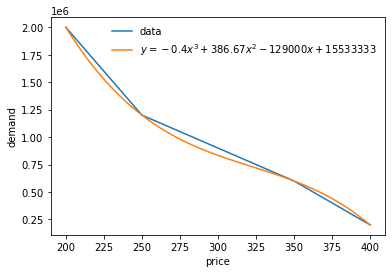

In [885]:
x = np.linspace(price[0], price[-1])
y = np.linspace(demand[0], demand[-1])
plt.plot(price, demand, label='data')
plt.plot(x, func(x, *opt), label='$y=%.1fx^3+%.2fx^2%.0fx+%.0f$' % tuple(opt))
plt.xlabel('price')
plt.ylabel('demand')
plt.legend(frameon=False);

Если форма кубической кривой не имеет уклона вниз, то такой подход приведет к плохому результату.

In [886]:
def profit(x):
    console_demand = func(x, *opt)
    console_revenue = console_demand * x
    console_cost = unit_cost * console_demand
    return console_revenue - console_cost # total profit

In [888]:
minimize(lambda x: -profit(x), [price[0]], method='Nelder-Mead')

 final_simplex: (array([[353.670578 ],
       [353.6706543]]), array([-60124238.70877141, -60124238.70872346]))
           fun: -60124238.70877141
       message: 'Optimization terminated successfully.'
          nfev: 48
           nit: 24
        status: 0
       success: True
             x: array([353.670578])

Оптимальной ценой на игровую приставку будет 353.67 доллара

***
2. Для выполнения этого задания возьмите данные о спросе из задания 1. Каждый владелец игровой приставки покупает в среднем 10 видеоигр. Прибыль от каждой видеоигры составляет 10 долларов. Какую цену следует назначить на игровую приставку?

In [889]:
def profit(x):
    games_purchased = 10
    unit_game_profit = 10
    console_demand = func(x, *opt)
    console_revenue = console_demand * x
    console_cost = unit_cost * console_demand
    game_profit = games_purchased * unit_game_profit * console_demand
    return console_revenue + game_profit - console_cost # total profit

In [890]:
minimize(lambda x: -profit(x), [price[0]], method='Nelder-Mead')

 final_simplex: (array([[318.76747131],
       [318.76754761]]), array([-1.25941774e+08, -1.25941774e+08]))
           fun: -125941773.60037506
       message: 'Optimization terminated successfully.'
          nfev: 46
           nit: 23
        status: 0
       success: True
             x: array([318.76747131])

Оптимальной ценой на игровую приставку будет 318.76 долларов

***
3. Необходимо определить правильную цену на новый еженедельный журнал. Переменные затраты на печать и распространение экземпляра журнала составляют 0,50 доллара. Рассматривается цена от 0,50 до 1,30 доллара за экземпляр. Расчетные еженедельные продажи журнала представлены в таблице
|Цена, долларов|Спрос (в млн)|
|--|--|
|0,5|2,00|
|0,9|1,20|
|1,3|0,30|

В дополнение к выручке от продаж журнала можно получить по 30 долларов за каждую проданную тысячу экземпляров каждой из 20 страниц рекламы, размещаемой в еженедельнике. Какую цену следует назначить на журнал?

In [891]:
price = [0.5, 0.9, 1.3]
demand = [2.00, 1.20, 0.30]

Для аппроксимации будем использовать квадратичную полиноминальную функцию.

In [892]:
def func(x, a, b, c):
    return a * x**2 + b * x + c

In [893]:
opt, _ = curve_fit(func, price, demand)

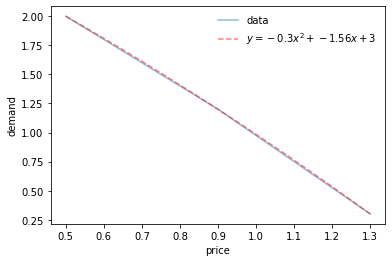

In [903]:
x = np.linspace(price[0], price[-1])
y = np.linspace(demand[0], demand[-1])
plt.plot(price, demand, label='data', alpha=.5)
plt.plot(x, func(x, *opt), label='$y=%.1fx^2+%.2fx+%.0f$' % tuple(opt), alpha=.5, color='r', linestyle='--')
plt.xlabel('price')
plt.ylabel('demand')
plt.legend(frameon=False);

In [907]:
def profit(x):
    cost = 0.25
    adv_pages = 20
    price_per_adv_page = 30 / 1000 # 30$ per 1000 copies
    mag_demand = func(x, *opt)
    adv_revenue = mag_demand * adv_pages * price_per_adv_page
    return mag_demand * (x - cost) + adv_revenue # total profit

In [908]:
minimize(lambda x: -profit(x), [price[0]], method='Nelder-Mead')

 final_simplex: (array([[0.59296875],
       [0.59306641]]), array([-1.71901562, -1.71901561]))
           fun: -1.7190156210958958
       message: 'Optimization terminated successfully.'
          nfev: 22
           nit: 11
        status: 0
       success: True
             x: array([0.59296875])

Оптимальная стоимоать журнала с учетом рекламы составляет 0.59 доллара

# Нелинейное ценообразование


### Что такое линейное ценообразование?
В предыдущих главах показано, как определить цену продукта, максимально увеличивающую прибыль. Однако в примерах к этим главам подразумевается, что независимо от количества единиц приобретаемого товара покупатель платит одну и ту же сумму за каждую единицу. Такая модель известна как *линейное ценообразование*, поскольку стоимость покупки $x$ единиц товара является линейной функцией $x$; а именно, $cost = price \times x$.
В этой главе показано, что нелинейное ценообразование зачастую может значительно увеличить прибыль компании.

### Что такое нелинейное ценообразование?
Нелинейная схема ценообразования просто означает, что стоимость покупки $x$ единиц товара не является прямолинейной функцией $x$. С нелинейными стратегиями ценообразования сталкивался каждый. Вот несколько примеров.
- Скидка с количества. Первые пять единиц товара могут стоить 20 долларов каждая, а остальные единицы — 12 долларов каждая. Скидки с количества, как правило, предоставляются компаниями, продающими программное обеспечение и компьютеры.
- Двухчастный тариф. При вступлении в загородный клуб обычно платят фиксированный взнос, а затем взнос за каждый раунд игры в гольф. Предположим, что загородный клуб взимает членский взнос в размере 500 долларов в год и 20 долларов за каждый раунд. Такой тип стратегии ценообразования называется *двухчастным тарифом*.

### Что такое объединение в набор и как оно может повысить прибыльность?
При объединении в набор клиенту предлагаются продукты по цене меньшей, чем сумма цен отдельных продуктов. Для анализа феномена объединения в набор необходимо понять, как рациональный потребитель принимает решение. Для каждой возможной комбинации продуктов рациональный потребитель определяет для себя ценность того, что продается, и вычитает из нее реальную стоимость покупки. Эта разница называется потребительским излишком. Рациональный потребитель не покупает ничего, если потребительский излишек для каждого доступного варианта является отрицательным. В противном случае потребитель покупает комбинацию продуктов, имеющую самый большой потребительский излишек.

Так как же объединение в набор может повысить прибыльность? Предположим, что вы продаете компьютеры и принтеры двум клиентам. Ценность, которую каждый клиент придает компьютеру и принтеру, представлена в таблице

|Клиент|Ценность компьютера, долларов|Ценность принтера, долларов|
|--|--|--|
|1|1000|500|
|2|500|1000|

Если компьютер и принтер предлагается для продажи только по отдельности, то, назначив цену 1000 долларов на принтер и на компьютер, вы продадите один принтер и один компьютер и получите 2000 долларов выручки. Теперь предположим, что вы предлагаете такой набор: компьютер и принтер за 1500 долларов. Каждый клиент купит и компьютер, и принтер, и вы получите 3000 долларов выручки. При объединении в набор компьютера и принтера можно извлечь больше выгоды из общей потребительской ценности. Объединение в набор действует эффективнее, если корреляция для потребительской ценности продуктов, включенных в набор, является отрицательной. В приведенном примере корреляция между ценностью продуктов отрицательная, поскольку клиент, который высоко оценивает принтер, дает низкую оценку компьютеру, а клиент, для которого принтер малоценен, высоко оценивает компьютер.

Когда вы приезжаете в тематический парк, такой как Диснейленд, вы не покупаете билет на каждый аттракцион. Вместо этого вы покупаете билет на вход в парк. Это пример чистого объединения в набор, поскольку потребитель не имеет возможности заплатить за подмножество предлагаемых продуктов. Такой подход уменьшает очереди (представьте очередь на каждый аттракцион) и приводит к дополнительной прибыли.

Чтобы понять причину увеличения прибыльности от объединения в набор, предположим, что имеется только один клиент и количество аттракционов, которые клиент собирается посетить, определяется следующей кривой спроса: (количество аттракционов) = 20 – 2 × (цена аттракциона). Исследование кривых спроса показало, что ценность, которую клиент придает $i$-му аттракциону, является ценой, при которой спрос равен $i$ - 0,5. Таким образом, $i$ – 0,5 = 20 – 2 × (ценность аттракциона $i$) или (ценность аттракциона $i$) = 10,25 – ($i$/2). Первый аттракцион стоит 9,75 доллара, второй аттракцион — 9,25 доллара и т. д. до двадцатого аттракциона, который стоит 0,25 доллара.

Предположим, что за аттракцион назначена постоянная цена и переменные затраты составляют 2 доллара за аттракцион. Требуется найти схему линейного ценообразования с максимальной прибылью.

Введите пробное значение цены в ячейку и вычислите количество приобретенных билетов на аттракционы по формуле =20-(2 * цена). Вычислите прибыль по формуле =спрос * (цена-себестоимость). Теперь найдите максимум значения (прибыль) путем изменения значения цены. Цена в 6 долларов приведет к покупке восьми билетов на аттракционы, что позволит получить максимальную прибыль в 32 доллара.